# Problem 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1

In [30]:
my_numbers = np.array([1, 5, 16, 14, 19, 3, 7, 12, 10, 15, 7, 9, 3, 16, 4, 11, 13, 5, 16, 3, 17, 11, 3, 17, 2, 5, 8, 16, 12, 18, 15, 2, 20, 5, 7, 3, 4, 7, 20, 5, 15, 2, 10, 8, 6, 9, 3, 5, 3, 7, 6, 3, 17, 1, 15, 12, 1, 7, 18, 17, 2, 5, 6, 17, 15, 13, 16, 1, 5, 7, 2, 19, 20, 3, 6, 3, 7, 16, 15, 4, 6, 16, 17, 20, 2, 3, 6, 1, 8, 7, 3, 17, 14, 15, 6, 5, 1, 8, 19, 1])
assert ((1 <= my_numbers) & (my_numbers <= 20)).all(), 'The values are out of range [1, 20]!'
assert len(my_numbers) == 100, f'You entered {len(my_numbers)} numbers instead of 100!'

## 1.2

In [31]:
# Uniform integers
np_numbers = np.random.randint(1, high=21, size=100)
assert ((1 <= np_numbers) & (np_numbers <= 20)).all(), 'The values are out of range [1, 20]!'
assert len(np_numbers) == 100, f'You entered {len(np_numbers)} numbers instead of 100!'

## 1.3

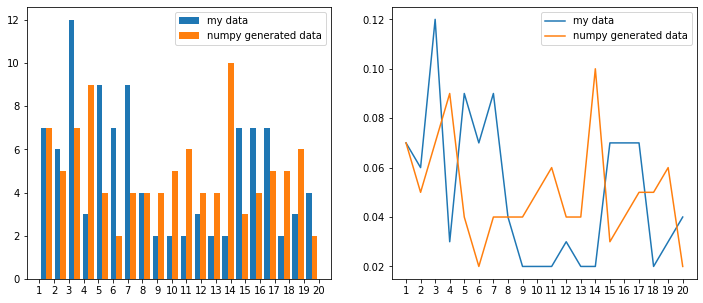

In [32]:
num_bins = 20
plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.subplot(121)
bins, *_ = plt.hist([my_numbers, np_numbers], bins=num_bins)
plt.xticks(ticks=range(1, 21), labels=range(1, 21))
plt.legend(['my data', 'numpy generated data'])

plt.subplot(122)
plt.plot(np.linspace(1, 20, num=num_bins), bins[0, :] / 100, color='tab:blue')
plt.plot(np.linspace(1, 20, num=num_bins), bins[1, :] / 100, color='tab:orange')
plt.xticks(ticks=range(1, 21), labels=range(1, 21))
plt.legend(['my data', 'numpy generated data']);

## 1.4

In [33]:
my_stats = {}
my_stats['mean'] = sum(my_numbers) / len(my_numbers)
my_stats['std'] = np.sqrt(sum((my_numbers - my_stats['mean'])**2) / len(my_numbers))
my_stats['skewness'] = sum(((my_numbers - my_stats['mean']) / my_stats['std'])**3) / len(my_numbers)
my_stats['kurtosis'] = sum(((my_numbers - my_stats['mean']) / my_stats['std'])**4) / len(my_numbers)

print(f'My data metrics:')
for key, value in my_stats.items():
    print(f'{key}: {value}')

My data metrics:
mean: 9.08
std: 6.002799346971376
skewness: 0.3440155991335924
kurtosis: 1.6888249238028963


In [34]:
np_stats = {}
np_stats['mean'] = sum(np_numbers) / len(np_numbers)
np_stats['std'] = np.sqrt(sum((np_numbers - np_stats['mean'])**2) / len(np_numbers))
np_stats['skewness'] = sum(((np_numbers - np_stats['mean']) / np_stats['std'])**3) / len(np_numbers)
np_stats['kurtosis'] = sum(((np_numbers - np_stats['mean']) / np_stats['std'])**4) / len(np_numbers)

print(f'Numpy data metrics:')
for key, value in np_stats.items():
    print(f'{key}: {value}')

Numpy data metrics:
mean: 9.96
std: 5.856483586590166
skewness: 0.015213332869118775
kurtosis: 1.701507386730791


Let $X \in U[1, 20]$.

Applying formulas for the sums of first $n$ integers, squares, cubes, fourth powers, we get the true metrics for the distribution:

$$
\mu = \sum_{i = 1}^{20} \frac{i}{20} = \frac{1 + 20}{2} \cdot 20 \cdot \frac{1}{20} = \frac{21}{2} = 10.5
$$

$$
\mathbb{E}X^2 =  =  = 
$$

$$
\sigma^2 = \mathbb{E}X^2 - (\mathbb{E}X)^2 = \frac{1}{20} \sum_{i = 1}^{20} i^2 - \mu^2 = \frac{20 \cdot (20 + 1) \cdot (40 + 1)}{6 \cdot 20} - \frac{21^2}{4} = \frac{133}{4}
$$

$$
\sigma = \sqrt{\frac{133}{4}} \approx 5.77
$$

Skewness $\tilde{\mu_3} = 0$ as the distribution is symmetrical.

$$
\mathrm{Kurt}(X) = \mathbb{E}\left(\left(\frac{X - \mu}{\sigma}\right)^4\right) = \frac{1}{\sigma^4} (\mathbb{E}(X^4) - 4 \mu \mathbb{E}(X^3) + 6 \mu^2 \mathbb{E}(X^2) - 4 \mu^4 + \mu^4) \approx 1.79
$$

### Comparison

In [35]:
pd.DataFrame(data={
    'My sampled data': my_stats.values(),
    'Numpy generated data': np_stats.values(),
    'True value': [10.5, 5.77, 0, 1.79],
}, index=my_stats.keys())

,My sampled data,Numpy generated data,True value
mean,9.080000,9.960000,10.50
std,6.002799,5.856484,5.77
skewness,0.344016,0.015213,0.00
kurtosis,1.688825,1.701507,1.79


## 1.5

In [36]:
def acf(x):
    n = len(x)
    mu = x.mean()
    sigma = x.std()

    return [sum((x[t] - mu) * (x[t + k] - mu) for t in range(n - k)) / n / sigma**2 for k in range(20)]

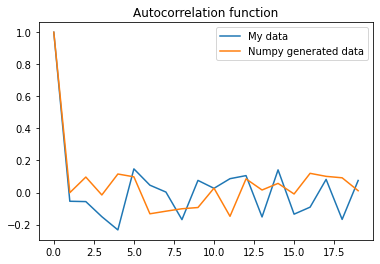

In [37]:
my_acf = acf(my_numbers)
np_acf = acf(np_numbers)
plt.plot(range(20), np.transpose([my_acf, np_acf]), label=['My data', 'Numpy generated data'])
plt.title('Autocorrelation function')
plt.legend();

Metrics of numpy generated sequence are closer to the expected values, especially the skewness, which indicates that the data generated by me is not as symmetric as it should be. It can also be seen in the deviation of the mean of my data from the expected mean value. However, I must note my data is quite random, too. Autocorrelation is close to zero and the metrics are not so bad. Still, numpy data is more random.

# Problem 2. Direct sampling

## 2.1 Inverse transform sampling from PDF $P(x)$

Let P(x) be the PDF of a given distribution. Then, corresponding CDF can be obtained as $F(x) = \int_{-\infty}^x P(t) dt$.

1. Find the inverse function of the CDF $F^{-1}(x)$
2. Generate random $u \in U[0, 1]$
3. Compute $x = F^{-1}(u)$

Obtained random variable has the sought distribution.

## 2.2

Let $P(x) \propto \frac{e^{-\lambda x}}{1 - \frac{1}{2} e^{-\lambda x}}, \, x \in [0, \infty), \, \lambda > 0$.

### Normalization condition:

$$
\int_0^\infty P(x) dx = \int_0^\infty \frac{C e^{-\lambda x} dx}{1 - \frac{1}{2} e^{-\lambda x}} = 1
$$

Substitution: $u = e^{-\lambda x}, \, du = -\lambda e^{-\lambda x} dx$

$$
\int_1^0 \frac{-C du}{\lambda (1 - \frac{u}{2})} = -\frac{2 C}{\lambda} \int_0^1 \frac{d(1 - \frac{u}{2})}{1 - \frac{u}{2}} = \left. -\frac{2 C}{\lambda} \mathrm{ln}(1 - \frac{u}{2}) \right|_0^1 = -\frac{2 C}{\lambda} (\mathrm{ln}\frac{1}{2} - 0) = \frac{C \mathrm{ln}4}{\lambda} = 1
$$

$$
C = \frac{\lambda}{\mathrm{ln}4}
$$

$$
P(x) = \frac{\lambda e^{-\lambda x}}{\mathrm{ln}4 \left(1 - \frac{1}{2} e^{-\lambda x}\right)}
$$

### CDF

$$
F(x) = \int_0^x P(t) dt = \left.-\frac{2}{\mathrm{ln} 4} \mathrm{ln} \left(1 - \frac{u}{2}\right)\right|_{e^{-\lambda x}}^1 = \frac{1}{\mathrm{ln} \frac{1}{2}} \left(\mathrm{ln} \frac{1}{2} - \mathrm{ln} \left(1 - \frac{e^{-\lambda x}}{2}\right)\right) = 1 + \mathrm{log}_2 \left(1 - \frac{e^{-\lambda x}}{2}\right)
$$

### Inverse CDF

$$
u = 1 + \mathrm{log}_2 \left(1 - \frac{e^{-\lambda x}}{2}\right)
$$

$$
1 - 2^{u - 1} = \frac{e^{-\lambda x}}{2}
$$

$$
x = -\frac{1}{\lambda} \mathrm{ln} \left(2 - 2^u\right)
$$

$$
F^{-1}(u) = -\frac{1}{\lambda} \mathrm{ln} \left(2 - 2^u\right)
$$

## 2.3

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
lambd = 1.

In [40]:
def P(x):
    return lambd * np.exp(-lambd * x) / np.log(4) / (1 - .5 * np.exp(-lambd * x))

In [41]:
def F_inv(u):
    return -1 / lambd * np.log(2 - 2**u)

In [42]:
u = np.random.uniform(size=10000)
x = F_inv(u)

## 2.4

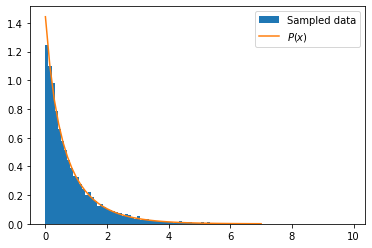

In [43]:
plt.hist(x, bins=100, density=True, label='Sampled data')
x_lin = np.linspace(0, 7)
plt.plot(x_lin, P(x_lin), label='$P(x)$')
plt.legend();

# Problem 3. Moment generating function

Assuming $X > 0$, because, generally, the cost should decrease with time, we obtain PDF:
$$
P(X) = \mathscr{L}^{-1}[M_X(-t)](X) = \frac{e^{-\frac{X}{2}}}{2}, \, X > 0
$$

$$
<100 (0.5)^X> = \int_0^\infty \frac{100}{2^X} \frac{e^{-\frac{X}{2}}}{2} dX = \frac{100}{1 + \mathrm{ln} 4} \approx 41.9
$$

# Problem 4. Transformation of probability density

Most straightforward way to sample a random point on the unit disk if $\xi_1$, $\xi_2$ are chosen from $U[0, 1]$ would be just to use $\xi_1$ as the radius and $\xi_2$ as the angle after scaling it by a factor of $2 \pi$. However, this would not lead us to uniform distribution of points along the disk because we would not account for the jacobian of the transformation from cartesian coordinates to polar coordinates. The points would mostly fall closer to the center of the disk. To get a truly uniform distribution along the disk, we must obtain new CDF and take into account the jacobian of the transformation. Then we should sample the points from the new inverse transform CDF. Illustrations are below.

In [81]:
import numpy as np
import matplotlib.pyplot as plt

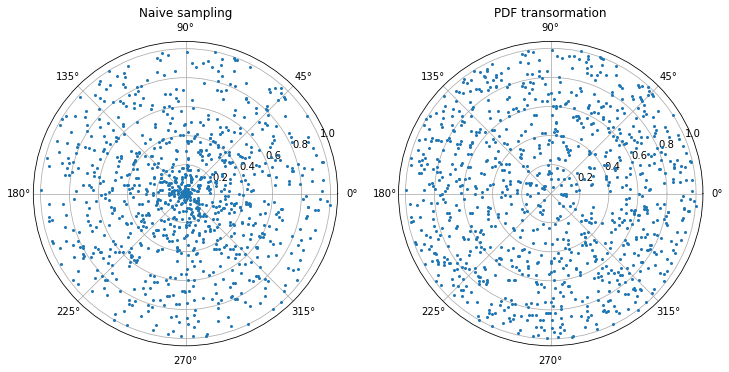

In [82]:
sample_size = 1000
ksi1 = np.random.uniform(size=sample_size)
ksi2 = np.random.uniform(size=sample_size) * 2 * np.pi

plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

plt.subplot(121, projection='polar')
plt.polar(ksi2, ksi1, 'o', ms=2)
plt.title('Naive sampling')

plt.subplot(122, projection='polar')
plt.polar(ksi2, np.sqrt(ksi1), 'o', ms=2)
plt.title('PDF transormation');

# Problem 5. Correlated random variables

Example: replacing Cholesky factorization with SVD because for $r = 1$ the correlation matrix is singular.

In [91]:
r = 1
Sigma = np.array([[1., r],
                  [r, 1.]])
u, s, _ = np.linalg.svd(Sigma)
A = u @ np.sqrt(np.diag(s))
A @ A.T

array([[1., 1.],
       [1., 1.]])

In [98]:
def sample(r):
    Sigma = np.array([[1., r],
                      [r, 1.]])
    u, s, _ = np.linalg.svd(Sigma)
    A = u @ np.sqrt(np.diag(s))
    z = np.random.uniform(size=(2, 100))
    mean = np.array([[np.pi], [np.pi]])
    x = mean + A @ z
    std = np.pi / 3**.5
    return x * std / x.std()

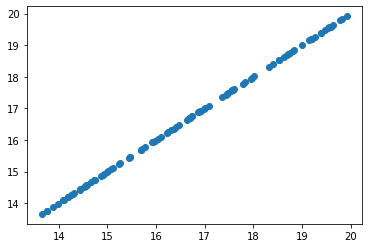

In [100]:
x = sample(1)
plt.scatter(x[0], x[1]);

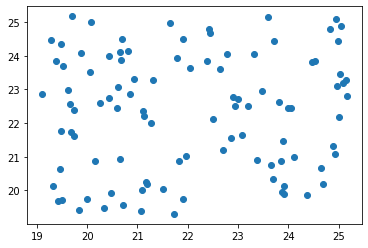

In [101]:
x = sample(0)
plt.scatter(x[0], x[1]);

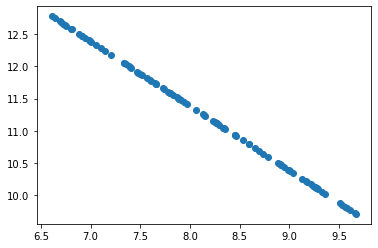

In [102]:
x = sample(-1)
plt.scatter(x[0], x[1]);